<a href="https://colab.research.google.com/github/apoorva2398/APS360-Project-Team-1-Winter-2019/blob/master/vgg_16_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import torch
#import models from torchvision
from torchvision import models
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time
import os
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import copy
from torch.autograd import Variable

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 3
        label_class = classes[label_index] # ex: 'cat'
        if label_class in target_classes:
            indices.append(i)

    return indices

In [0]:
def get_data_loader(target_classes, batch_size):
    """ Returns the indices for datapoints in the dataset that
    belongs to the desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    classes = ('benign', 'malignant')
    
# Data augmentation: resize image to 224
    transform = transforms.Compose(
        [transforms.Resize(224),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.ImageFolder(root='/content/gdrive/My Drive/APS360 Project Shared Folder/Data/Cropped ROI Data/data (resized to 224 x 224 x 3, two classes, tif)/train', transform=transform)    

    valset = torchvision.datasets.ImageFolder(root='/content/gdrive/My Drive/APS360 Project Shared Folder/Data/Cropped ROI Data/data (resized to 224 x 224 x 3, two classes, tif)/validation', transform=transform)
    
    testset = torchvision.datasets.ImageFolder(root='/content/gdrive/My Drive/APS360 Project Shared Folder/Data/Cropped ROI Data/data (resized to 224 x 224 x 3, two classes, tif)/test', transform=transform)
    
    
    relevant_train_indices = get_relevant_indices(
            trainset,
            classes,
            target_classes)
    
    relevant_val_indices = get_relevant_indices(
            valset,
            classes,
            target_classes)
    
    relevant_test_indices = get_relevant_indices(
            testset,
            classes,
            target_classes)
    
    
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                              num_workers=1, sampler=train_sampler)

  #  val_sampler = SubsetRandomSampler(valset)
    
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    
    val_loader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)

    test_sampler = SubsetRandomSampler(relevant_test_indices)
    
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
                                              num_workers=1, sampler=test_sampler)

    return train_loader, val_loader, test_loader, classes

In [0]:
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["benign", "malignant"], 
    batch_size=32)

ValueError: ignored

torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32
torch.Size([3, 224, 224])
32


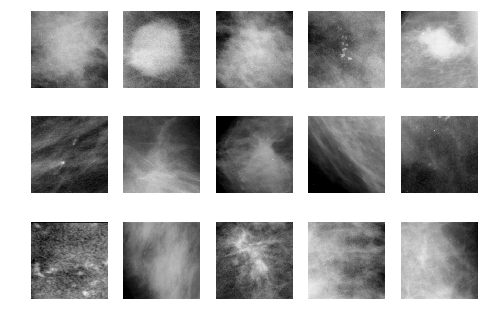

In [0]:
k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    print (image.size())
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)
    print (len(labels))
    k += 1
    if k > 14:
        break

In [0]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path


def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)

    return norm_labels



def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0

    for i, data in enumerate(loader, 0):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #loss = criterion(outputs.squeeze(1), labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)

    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)

    return err, loss


def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cats vs dogs
    target_classes = ["benign", "malignant"]

    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)

    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)

    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0

        total_epoch = 0

        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            
            
            inputs, labels = data
            inputs = inputs.to('cuda')
            labels = labels.to('cuda')
            #labels = normalize_label(labels) # Convert labels to 0/1

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass, backward pass, and optimize
            outputs = net(inputs.cuda())
            loss = criterion(outputs, labels.float())
            #loss = criterion(outputs.squeeze(1), labels.float())
            loss.backward()
            optimizer.step()

            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            

        train_err[epoch], train_loss[epoch] = evaluate(net, train_loader, criterion)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)

        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))

        # Save the current model (checkpoint) to a file
        model_path = get_model_name('my_vgg16', batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)

    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)


###############################################################################
# Training Curve

def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt

    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    plt.plot(range(1,31), train_err, label="Train")
    plt.plot(range(1,31), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,31), train_loss, label="Train")
    plt.plot(range(1,31), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()


In [0]:
# Load a pre-trained model in PyTorch
my_vgg16 = torchvision.models.vgg16(pretrained=True)
my_vgg16

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
553433881it [00:07, 71419939.29it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
# Freeze transfer learning model weights
for param in my_vgg16.parameters():
    param.requires_grad = False

NameError: ignored

In [0]:
# Add my custom classifier
my_vgg16.classifier[6] = nn.Sequential(
                        nn.Linear(4096, 256), #fully connected layer; input_size = 25088; output_size = 256
                        nn.ReLU(), #ReLU activation
                        nn.Dropout(0.4), # 40% dropout rate
                        nn.Linear(256, 1),  #fully connected layer; input_size = 256; output_size = 2 classes (normal vs abnormal)                 
                        nn.LogSoftmax(dim=1)) # log softmax to produce a probability 
                        
# print my_vgg16 classifier
my_vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4)
    (3): Linear(in_features=256, out_features=1, bias=True)
    (4): LogSoftmax()
  )
)

In [0]:
# Find total parameters and trainable parameters
total_params = sum(p.numel() for p in my_vgg16.parameters())
print(f'{total_params:,} total parameters.')

total_trainable_params = sum(p.numel() for p in my_vgg16.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

135,309,633 total parameters.
1,049,089 training parameters.


In [0]:
# Move to gpu
my_vgg16 = my_vgg16.to('cuda')

In [0]:
train_net(my_vgg16)

Epoch 1: Train err: 0.4081187254474029, Train loss: 0.6931471824645996 |Validation err: 0.4293193717277487, Validation loss: 0.6931471758418613
Epoch 2: Train err: 0.4081187254474029, Train loss: 0.6931471824645996 |Validation err: 0.4293193717277487, Validation loss: 0.6931471758418613
Epoch 3: Train err: 0.4081187254474029, Train loss: 0.6931471824645996 |Validation err: 0.4293193717277487, Validation loss: 0.6931471758418613
Epoch 4: Train err: 0.4081187254474029, Train loss: 0.6931471824645996 |Validation err: 0.4293193717277487, Validation loss: 0.6931471758418613


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: ignored

In [0]:
train_net(my_vgg16, batch_size=64, learning_rate=0.0001, num_epochs=30)

Epoch 1: Train err: 25.97222222222222, Train loss: 0.6931471824645996 |Validation err: 27.333333333333332, Validation loss: 0.6931471758418613
Epoch 2: Train err: 25.97222222222222, Train loss: 0.6931471824645996 |Validation err: 27.333333333333332, Validation loss: 0.6931471758418613
Epoch 3: Train err: 25.97222222222222, Train loss: 0.6931471824645996 |Validation err: 27.333333333333332, Validation loss: 0.6931471758418613


KeyboardInterrupt: ignored

In [0]:
train_net(my_vgg16, batch_size=64, learning_rate=0.001, num_epochs=30)

Epoch 1: Train err: 25.97222222222222, Train loss: 0.6931471824645996 |Validation err: 27.333333333333332, Validation loss: 0.6931471758418613
Epoch 2: Train err: 25.97222222222222, Train loss: 0.6931471824645996 |Validation err: 27.333333333333332, Validation loss: 0.6931471758418613


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)


KeyboardInterrupt: ignored

  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


In [0]:
train_net(my_vgg16, batch_size=64, learning_rate=0.00001, num_epochs=30)

Epoch 1: Train err: 25.97222222222222, Train loss: 0.6931471824645996 |Validation err: 27.333333333333332, Validation loss: 0.6931471758418613
Epoch 2: Train err: 25.97222222222222, Train loss: 0.6931471824645996 |Validation err: 27.333333333333332, Validation loss: 0.6931471758418613


KeyboardInterrupt: ignored

In [0]:
train_net(my_vgg16, batch_size=32, learning_rate=0.0001, num_epochs=30)

Epoch 1: Train err: 12.98611111111111, Train loss: 0.6931471824645996 |Validation err: 13.666666666666666, Validation loss: 0.6931471824645996
Epoch 2: Train err: 12.98611111111111, Train loss: 0.6931471824645996 |Validation err: 13.666666666666666, Validation loss: 0.6931471824645996
Epoch 3: Train err: 12.98611111111111, Train loss: 0.6931471824645996 |Validation err: 13.666666666666666, Validation loss: 0.6931471824645996


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)


KeyboardInterrupt: ignored

BrokenPipeError: [Errno 32] Broken pipe


In [0]:
train_net(my_vgg16, batch_size=32, learning_rate=0.1, num_epochs=30)

KeyboardInterrupt: ignored

In [0]:
train_net(my_vgg16, batch_size=32, learning_rate=0.00001, num_epochs=30)

Epoch 1: Train err: 12.98611111111111, Train loss: 0.6931471824645996 |Validation err: 13.666666666666666, Validation loss: 0.6931471824645996


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: ignored

In [0]:
train_net(my_vgg16, batch_size=128, learning_rate=0.0001, num_epochs=30)

Epoch 1: Train err: 51.94444444444444, Train loss: 0.6931471824645996 |Validation err: 49.2, Validation loss: 0.6931471705436707
Epoch 2: Train err: 51.94444444444444, Train loss: 0.6931471824645996 |Validation err: 49.2, Validation loss: 0.6931471705436707
Epoch 3: Train err: 51.94444444444444, Train loss: 0.6931471824645996 |Validation err: 49.2, Validation loss: 0.6931471705436707


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])


KeyboardInterrupt: ignored

  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


In [0]:
train_net(my_vgg16, batch_size=32, learning_rate=0.01, num_epochs=30)

Epoch 1: Train err: 0.4081187254474029, Train loss: 0.6931471824645996 |Validation err: 0.4293193717277487, Validation loss: 0.6931471824645996
Epoch 2: Train err: 0.4081187254474029, Train loss: 0.6931471824645996 |Validation err: 0.4293193717277487, Validation loss: 0.6931471824645996
Epoch 3: Train err: 0.4081187254474029, Train loss: 0.6931471824645996 |Validation err: 0.4293193717277487, Validation loss: 0.6931471824645996


KeyboardInterrupt: ignored

In [0]:
class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.name = "fconnected"
        self.layer0 = nn.Linear(224 * 224 *3, 500)
        self.layer1 = nn.Linear(500, 50)
        self.layer2 = nn.Linear(50, 20)
        self.layer3 = nn.Linear(20, 1)
    def forward(self, img):
        #print(img.size())
        flattened = img.view(-1, 224 * 224 *3)
        activation0 = F.relu(self.layer0(flattened))
        activation1 = F.relu(self.layer1(activation0))
        activation2 = F.relu(self.layer2(activation1))
        output = self.layer3(activation2)
        output=output.squeeze(1)
        return output

In [0]:
fconnected = FCN()
fconnected.to('cuda')
train_net(fconnected, 64, 0.01, 15)

RuntimeError: ignored